In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Rayleigh

$s_2$ = Laplaciana

$s_3$ = $\chi ^2 $

In [58]:
sources = np.loadtxt(source_path+'/'+'FifthSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'FifthMixMatrix.txt')

x = np.loadtxt(obs_path+'FifthMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [59]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.12329171,  0.29346866,  0.22220605],
       [ 0.12329171,  1.        ,  0.08677325,  0.18445086],
       [ 0.29346866,  0.08677325,  1.        ,  0.35382794],
       [ 0.22220605,  0.18445086,  0.35382794,  1.        ]])

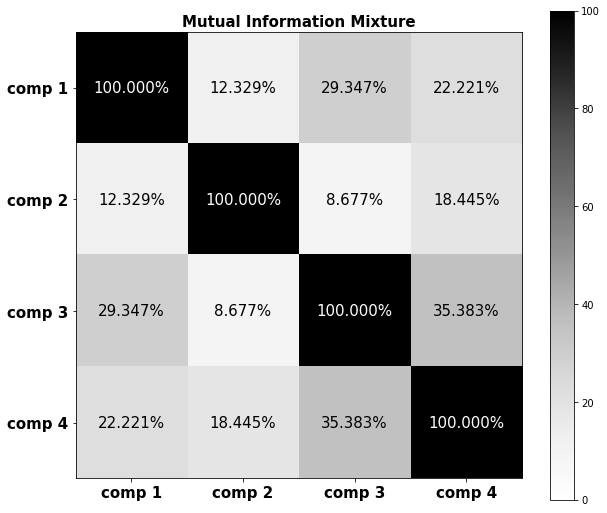

In [60]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run5_mix_MI_100',save=True)

In [61]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.07764883,  0.0428546 ,  0.06381438],
       [ 0.07764883,  1.        ,  0.12304413,  0.08579162],
       [ 0.0428546 ,  0.12304413,  1.        ,  0.12314942],
       [ 0.06381438,  0.08579162,  0.12314942,  1.        ]])

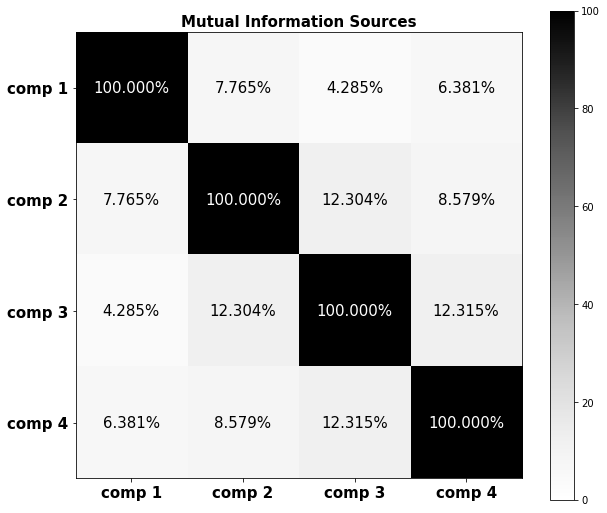

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run5_sources_MI_100',save=True)

In [62]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.25935624,  0.2868398 ,  0.16109469,  0.5389127 ],
         [ 0.25284458,  0.23837472,  0.15318913,  0.51807501],
         [ 0.26579078,  0.20235881,  0.42691121,  0.11127187],
         [ 0.25991105,  0.18036096,  0.36914912,  0.15428748]]),
  array([[ 0.31126605,  0.3348901 ,  0.33568677,  0.37155792],
         [ 0.26516021,  0.19108147,  0.2266339 ,  0.19976055],
         [ 0.16456281,  0.14884119,  0.36140789,  0.38734033],
         [ 0.56810326,  0.51582404,  0.11954639,  0.14632048]])],
 array([[ 0.28531115,  0.31086495,  0.24839073,  0.45523531],
        [ 0.2590024 ,  0.21472809,  0.18991152,  0.35891778],
        [ 0.21517679,  0.1756    ,  0.39415955,  0.2493061 ],
        [ 0.41400715,  0.3480925 ,  0.24434776,  0.15030398]]),
 array([[ 0.21463929,  0.16647115,  0.12766136,  0.31634503],
        [ 0.24494351,  0.13674789,  0.15456598,  0.33073249],
        [ 0.2347804 ,  0.16915482,  0.21859916,  0.09330982],
        [ 0.31567872,  0.12068422,  0.2114705 ,  0.0867

In [63]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 10000
Time to converges the FastICA: 2.711 seconds


In [64]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  8.01205025079 E2 =  3.8717938188


In [65]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.14529034,  0.14588929,  0.13855785],
       [ 0.14529034,  1.        ,  0.19525232,  0.12893236],
       [ 0.14588929,  0.19525232,  1.        ,  0.15547513],
       [ 0.13855785,  0.12893236,  0.15547513,  1.        ]])

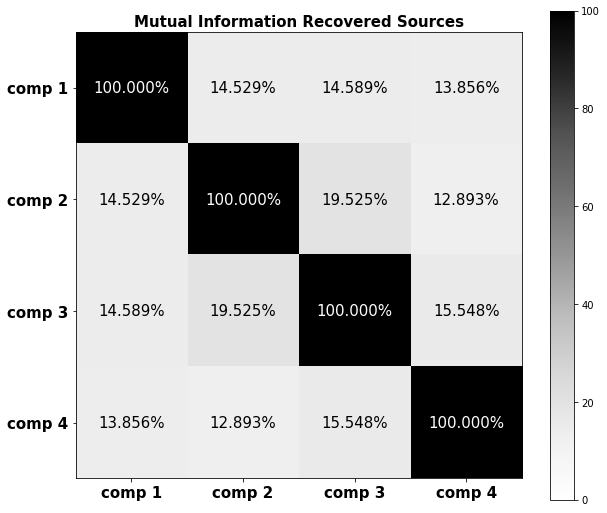

In [66]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run5_reco_MI_100',save=True)

In [67]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.04992843,  0.09541578,  0.11223417,  0.05835985],
       [ 0.11149075,  0.0951153 ,  0.26074241,  0.24204971],
       [ 0.16263439,  0.28979919,  0.17330468,  0.1723961 ],
       [ 0.52369198,  0.12678848,  0.13372779,  0.11007307]])

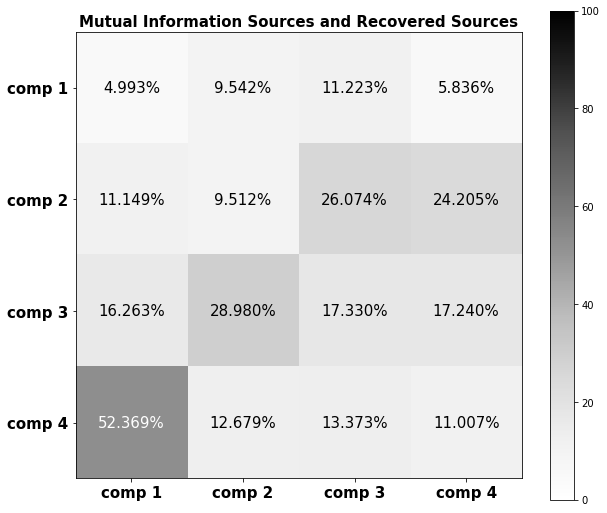

In [68]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run5_sourcesreco_MI_100',save=True)

In [70]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[3,:]
ordened_recovered_sources[1,:] = -1*recovered_sources[2,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = -1*recovered_sources[0,:]


Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.05835985,  0.11223417,  0.09541578,  0.04992843],
       [ 0.24204971,  0.26074241,  0.0951153 ,  0.11149075],
       [ 0.1723961 ,  0.17330468,  0.28979919,  0.16263439],
       [ 0.11007307,  0.13372779,  0.12678848,  0.52369198]])

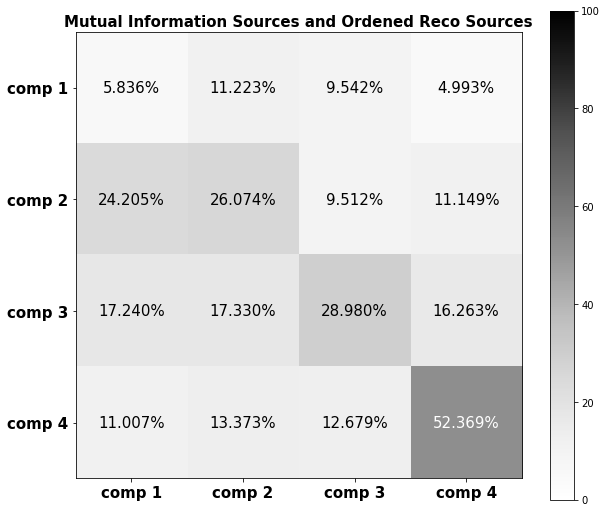

In [71]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run5_sourcesreco_ordened_MI_100',save=True)

In [72]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [73]:
SKL_div,JS_div

(array([[ 0.28856096,  0.23677175,  0.24291893,  0.37610932],
        [ 0.26578645,  0.11796082,  0.15940291,  0.39163602],
        [ 0.20472846,  0.12442941,  0.10712456,  0.37570615],
        [ 0.41476946,  0.42561877,  0.3951855 ,  0.61173615]]),
 array([[ 0.13692201,  0.164802  ,  0.17716529,  0.18582824],
        [ 0.12219584,  0.08804203,  0.13308359,  0.27100133],
        [ 0.07952759,  0.1077554 ,  0.06531308,  0.15424076],
        [ 0.23970799,  0.19179986,  0.24359803,  0.34968468]]))

In [74]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.136922 &  0.164802 &  0.177165 &  0.185828 \\
1 &  0.122196 &  0.088042 &  0.133084 &  0.271001 \\
2 &  0.079528 &  0.107755 &  0.065313 &  0.154241 \\
3 &  0.239708 &  0.191800 &  0.243598 &  0.349685 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.288561 &  0.236772 &  0.242919 &  0.376109 \\
1 &  0.265786 &  0.117961 &  0.159403 &  0.391636 \\
2 &  0.204728 &  0.124429 &  0.107125 &  0.375706 \\
3 &  0.414769 &  0.425619 &  0.395186 &  0.611736 \\
\bottomrule
\end{tabular}



In [75]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  1.00000000e+04,   0.00000000e+00,   0.00000000e+00],
       [  2.71100000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.01205025e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.87179382e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.27300533e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [76]:
sources = np.loadtxt(source_path+'/'+'FifthSource1000Stats.txt')

x = np.loadtxt(obs_path+'FifthMixture1000Stats.txt')


In [77]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.1285502 ,  0.17916056,  0.12079654],
       [ 0.1285502 ,  1.        ,  0.05487592,  0.11575582],
       [ 0.17916056,  0.05487592,  1.        ,  0.18261574],
       [ 0.12079654,  0.11575582,  0.18261574,  1.        ]])

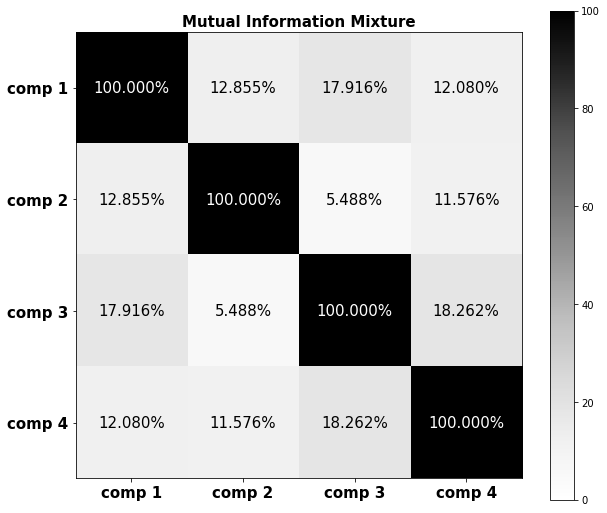

In [78]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run5_mix_MI_1k',save=True)

In [79]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02594738,  0.0285706 ,  0.02199146],
       [ 0.02594738,  1.        ,  0.05066409,  0.05088483],
       [ 0.0285706 ,  0.05066409,  1.        ,  0.07664217],
       [ 0.02199146,  0.05088483,  0.07664217,  1.        ]])

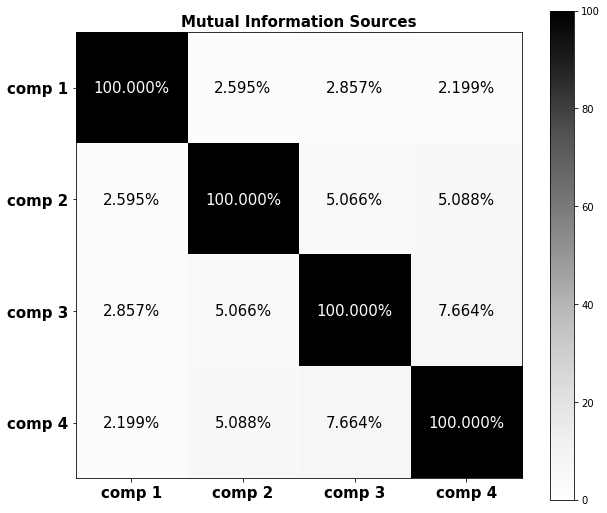

In [80]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run5_sources_MI_1k',save=True)

In [81]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 72
Time to converges the FastICA: 0.046 seconds


In [82]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.08765087,  0.05901342,  0.05896499],
       [ 0.08765087,  1.        ,  0.05755226,  0.05595349],
       [ 0.05901342,  0.05755226,  1.        ,  0.06235515],
       [ 0.05896499,  0.05595349,  0.06235515,  1.        ]])

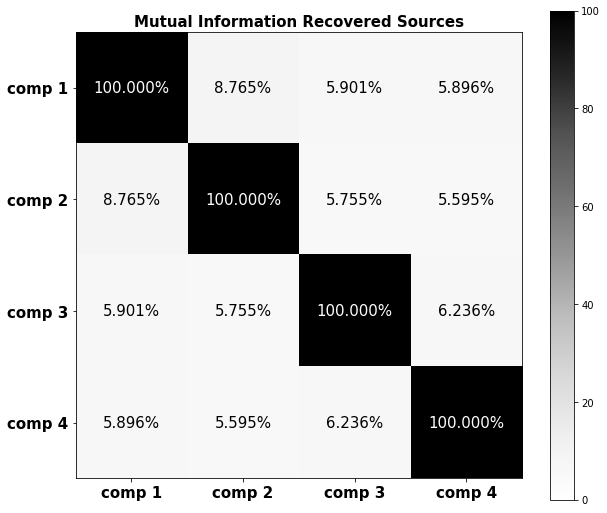

In [83]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run5_reco_MI_1k',save=True)

In [84]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.02888338,  0.02646862,  0.09585885,  0.03090388],
       [ 0.0521716 ,  0.05460471,  0.06979859,  0.55098214],
       [ 0.43330088,  0.08842881,  0.06406012,  0.05701517],
       [ 0.08148468,  0.61679517,  0.05616818,  0.05710215]])

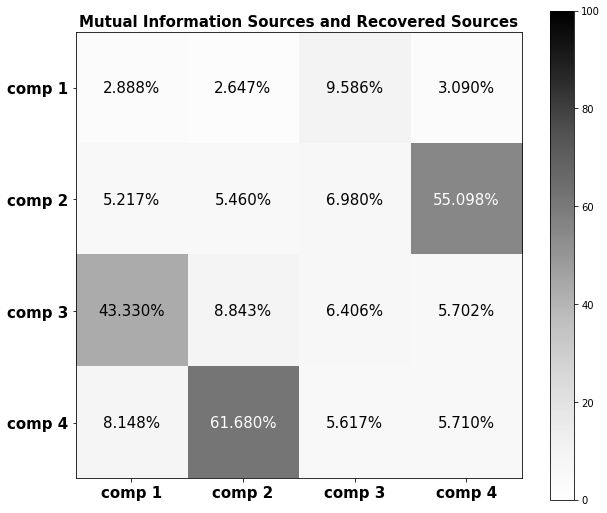

In [85]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run5_sourcesreco_MI_1k',save=True)

In [88]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = -1*recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]
ordened_recovered_sources[3,:] = -1*recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.09585885,  0.03090388,  0.02888338,  0.02646862],
       [ 0.06979859,  0.55098214,  0.0521716 ,  0.05460471],
       [ 0.06406012,  0.05701517,  0.43330088,  0.08842881],
       [ 0.05616818,  0.05710215,  0.08148468,  0.61679517]])

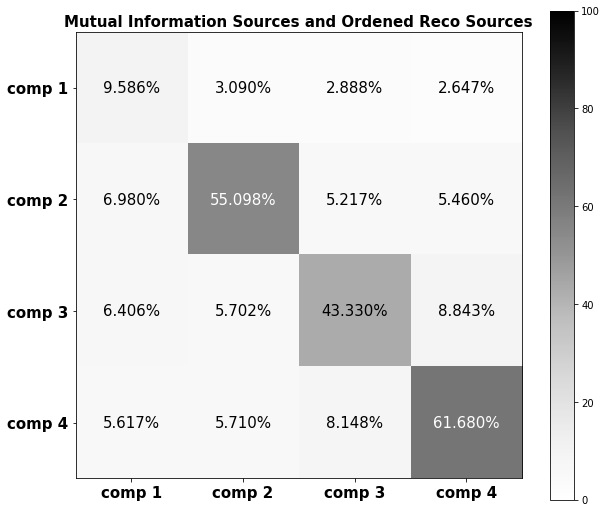

In [89]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run5_sourcesreco_ordened_MI_1k',save=True)

In [90]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [91]:
SKL_div,JS_div

(array([[ 0.3972854 ,  0.45477413,  0.50120492,  0.66313049],
        [ 0.48708352,  0.10526698,  0.79750116,  0.42577788],
        [ 0.41163086,  0.77312131,  0.04810368,  1.2368601 ],
        [ 0.89729558,  0.39991581,  0.71386918,  0.12541823]]),
 array([[ 0.16839437,  0.16075367,  0.27751009,  0.24567558],
        [ 0.30160542,  0.06000918,  0.41752262,  0.16642503],
        [ 0.19086013,  0.41508087,  0.02783328,  0.37864622],
        [ 0.39045201,  0.25358165,  0.4911098 ,  0.05408077]]))

In [92]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.168394 &  0.160754 &  0.277510 &  0.245676 \\
1 &  0.301605 &  0.060009 &  0.417523 &  0.166425 \\
2 &  0.190860 &  0.415081 &  0.027833 &  0.378646 \\
3 &  0.390452 &  0.253582 &  0.491110 &  0.054081 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.397285 &  0.454774 &  0.501205 &  0.663130 \\
1 &  0.487084 &  0.105267 &  0.797501 &  0.425778 \\
2 &  0.411631 &  0.773121 &  0.048104 &  1.236860 \\
3 &  0.897296 &  0.399916 &  0.713869 &  0.125418 \\
\bottomrule
\end{tabular}



In [93]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.00000000e+04,   7.20000000e+01,   0.00000000e+00],
       [  2.71100000e+00,   4.60000000e-02,   0.00000000e+00],
       [  8.01205025e+00,   8.77886635e+00,   0.00000000e+00],
       [  3.87179382e+00,   5.03934406e+00,   0.00000000e+00],
       [  8.27300533e+00,   6.96945646e+00,   0.00000000e+00]])

# Using 100K stats

In [94]:
sources = np.loadtxt(source_path+'/'+'FifthSource100000Stats.txt')

x = np.loadtxt(obs_path+'FifthMixture100000Stats.txt')


In [95]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.07188591,  0.10206999,  0.05439998],
       [ 0.07188591,  1.        ,  0.01595387,  0.04284733],
       [ 0.10206999,  0.01595387,  1.        ,  0.10709858],
       [ 0.05439998,  0.04284733,  0.10709858,  1.        ]])

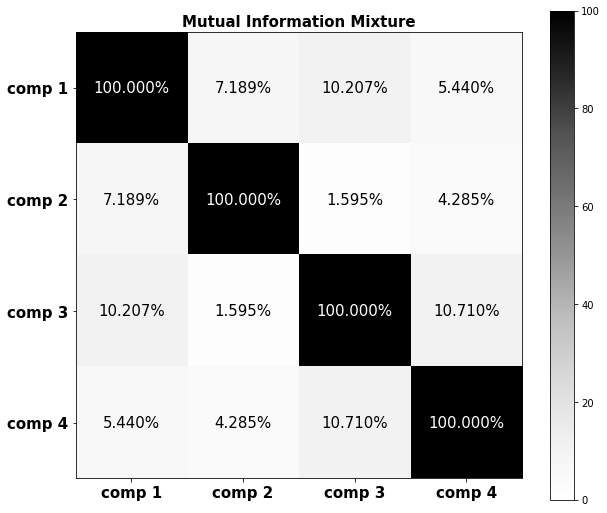

In [96]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run5_mix_MI_100k',save=True)

In [97]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00258435,  0.00278617,  0.00259475],
       [ 0.00258435,  1.        ,  0.01008619,  0.01003722],
       [ 0.00278617,  0.01008619,  1.        ,  0.01535747],
       [ 0.00259475,  0.01003722,  0.01535747,  1.        ]])

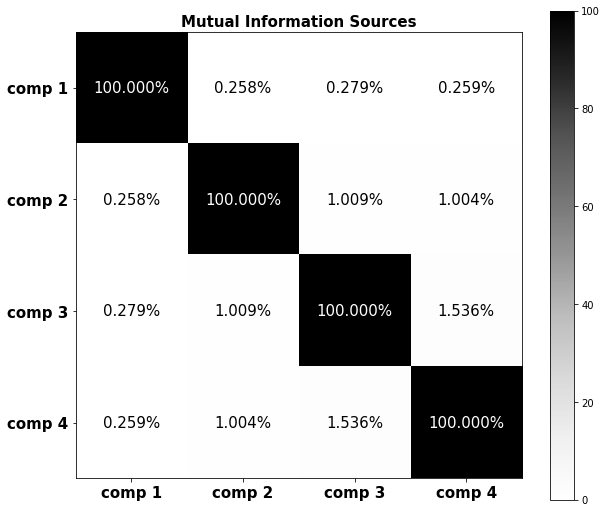

In [98]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run5_sources_MI_100k',save=True)

In [99]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 7
Time to converges the FastICA: 0.304 seconds


In [100]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.01111844,  0.01238382,  0.0105502 ],
       [ 0.01111844,  1.        ,  0.0108594 ,  0.0160589 ],
       [ 0.01238382,  0.0108594 ,  1.        ,  0.0109372 ],
       [ 0.0105502 ,  0.0160589 ,  0.0109372 ,  1.        ]])

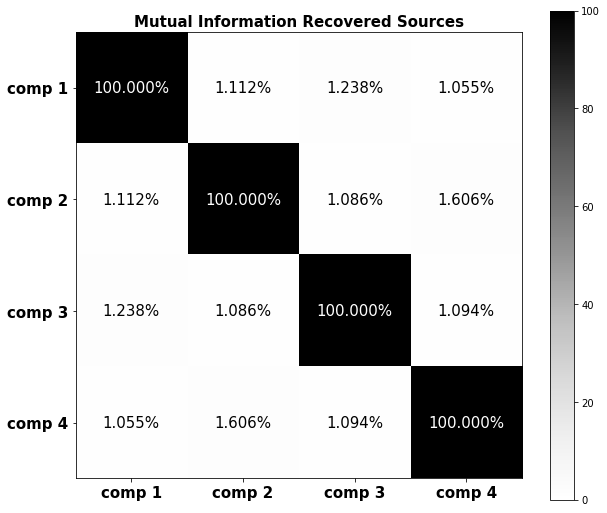

In [101]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run5_reco_MI_100k',save=True)

In [102]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.00270635,  0.00299978,  0.05594793,  0.00594616],
       [ 0.48259692,  0.01046432,  0.0126809 ,  0.01029436],
       [ 0.01061297,  0.01566488,  0.01104743,  0.33872986],
       [ 0.01098222,  0.56004176,  0.01101707,  0.01558852]])

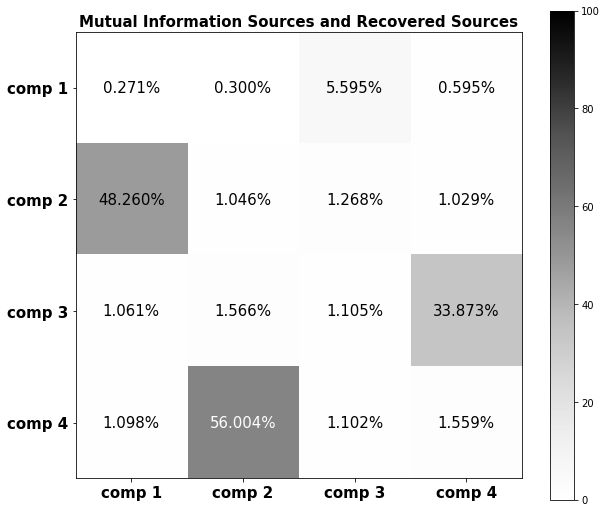

In [103]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run5_sourcesreco_MI_100k',save=True)

In [112]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = -1*recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[3,:]
ordened_recovered_sources[3,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.05594793,  0.00270635,  0.00594616,  0.00299978],
       [ 0.0126809 ,  0.48259692,  0.01029436,  0.01046432],
       [ 0.01104743,  0.01061297,  0.33872986,  0.01566488],
       [ 0.01101707,  0.01098222,  0.01558852,  0.56004176]])

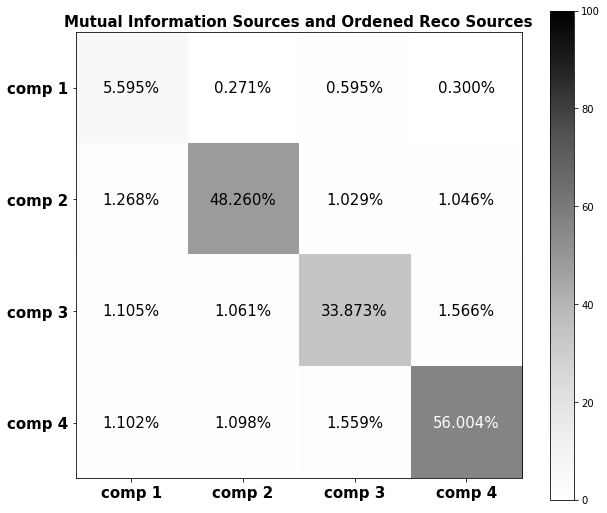

In [113]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run5_sourcesreco_ordened_MI_100k',save=True)

In [114]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [115]:
SKL_div,JS_div

(array([[ 0.55770181,  0.74222088,  0.6565097 ,  1.10977932],
        [ 0.7124857 ,  0.1039439 ,  1.39892242,  0.41394949],
        [ 0.49578366,  0.92873025,  0.29951214,  1.70332137],
        [ 1.10534693,  0.47427226,  1.4125558 ,  0.13353841]]),
 array([[ 0.19236928,  0.20144998,  0.34211268,  0.28813882],
        [ 0.4128782 ,  0.04446412,  0.53729955,  0.15086848],
        [ 0.21529548,  0.65357762,  0.15202025,  0.72760633],
        [ 0.71869645,  0.2484386 ,  0.91931437,  0.0461753 ]]))

In [116]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.192369 &  0.201450 &  0.342113 &  0.288139 \\
1 &  0.412878 &  0.044464 &  0.537300 &  0.150868 \\
2 &  0.215295 &  0.653578 &  0.152020 &  0.727606 \\
3 &  0.718696 &  0.248439 &  0.919314 &  0.046175 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.557702 &  0.742221 &  0.656510 &  1.109779 \\
1 &  0.712486 &  0.103944 &  1.398922 &  0.413949 \\
2 &  0.495784 &  0.928730 &  0.299512 &  1.703321 \\
3 &  1.105347 &  0.474272 &  1.412556 &  0.133538 \\
\bottomrule
\end{tabular}



In [117]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.00000000e+04,   7.20000000e+01,   7.00000000e+00],
       [  2.71100000e+00,   4.60000000e-02,   3.04000000e-01],
       [  8.01205025e+00,   8.77886635e+00,   8.60338785e+00],
       [  3.87179382e+00,   5.03934406e+00,   4.78750206e+00],
       [  8.27300533e+00,   6.96945646e+00,   7.30470867e+00]])

In [118]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &             0 &          1 &         2 \\
\midrule
0 &  10000.000000 &  72.000000 &  7.000000 \\
1 &      2.711000 &   0.046000 &  0.304000 \\
2 &      8.012050 &   8.778866 &  8.603388 \\
3 &      3.871794 &   5.039344 &  4.787502 \\
4 &      8.273005 &   6.969456 &  7.304709 \\
\bottomrule
\end{tabular}

